In [2]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
import wfdb

In [4]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import torch
import random
from IPython import display
from tqdm import tqdm
from shutil import copyfile

E0000 00:00:1736384178.957579      10 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:479
D0109 00:56:18.966055337      10 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0109 00:56:18.966071417      10 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0109 00:56:18.966074835      10 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0109 00:56:18.966077264      10 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0109 00:56:18.966079672      10 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defa

In [5]:
PATH = '/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'

ECG_df = pd.read_csv(os.path.join('/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptbxl_database.csv'), index_col='ecg_id')
ECG_df.scp_codes = ECG_df.scp_codes.apply(lambda x: ast.literal_eval(x))
ECG_df.patient_id = ECG_df.patient_id.astype(int)
ECG_df.nurse = ECG_df.nurse.astype('Int64')
ECG_df.site = ECG_df.site.astype('Int64')
ECG_df.validated_by = ECG_df.validated_by.astype('Int64')

SCP_df = pd.read_csv(os.path.join('/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/scp_statements.csv'), index_col=0)
SCP_df = SCP_df[SCP_df.diagnostic == 1]

ECG_df

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709,56.0,1,NaN,63.0,2,0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243,19.0,0,NaN,70.0,2,0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372,37.0,1,NaN,69.0,2,0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014,24.0,0,NaN,82.0,2,0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448,19.0,1,NaN,70.0,2,0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180,67.0,1,NaN,NaN,1,2,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703,93.0,0,NaN,NaN,1,2,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311,59.0,1,NaN,NaN,1,2,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [6]:
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_class)
    return list(res)

def diagnostic_subclass(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_subclass)
    return list(res)

ECG_df['scp_classes'] = ECG_df.scp_codes.apply(diagnostic_class)
ECG_df['scp_subclasses'] = ECG_df.scp_codes.apply(diagnostic_subclass)

In [7]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
        data = np.array([signal for signal, meta in data])
    return data

sampling_rate = 500
ECG_data = load_raw_data(ECG_df, sampling_rate, PATH)
ECG_data.shape

(21837, 1000, 12)

In [8]:
X = pd.DataFrame(index=ECG_df.index)

X['age'] = ECG_df.age
X.age.fillna(0, inplace=True)

X['sex'] = ECG_df.sex.astype(float)
X.sex.fillna(0, inplace=True)

X['height'] = ECG_df.height
X.loc[X.height < 50, 'height'] = np.nan
X.height.fillna(0, inplace=True)

X['weight'] = ECG_df.weight
X.weight.fillna(0, inplace=True)

X['infarction_stadium1'] = ECG_df.infarction_stadium1.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = ECG_df.infarction_stadium2.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

X['pacemaker'] = (ECG_df.pacemaker == 'ja, pacemaker').astype(float)

X

/tmp/ipykernel_10/3316299910.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(0, inplace=True)
/tmp/ipykernel_10/3316299910.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: 

,age,sex,height,weight,infarction_stadium1,infarction_stadium2,pacemaker
ecg_id,,,,,,,
1,56.0,1.0,0.0,63.0,0.0,0.0,0.0
2,19.0,0.0,0.0,70.0,0.0,0.0,0.0
3,37.0,1.0,0.0,69.0,0.0,0.0,0.0
4,24.0,0.0,0.0,82.0,0.0,0.0,0.0
5,19.0,1.0,0.0,70.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21833,67.0,1.0,0.0,0.0,0.0,0.0,0.0
21834,93.0,0.0,0.0,0.0,4.0,0.0,0.0
21835,59.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
Z = pd.DataFrame(0, index=ECG_df.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')
for i in Z.index:
    for k in ECG_df.loc[i].scp_classes:
        Z.loc[i, k] = 1

Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


In [10]:
X_train, Y_train, Z_train = X[ECG_df.strat_fold <= 8],  ECG_data[X[ECG_df.strat_fold <= 8].index - 10919],  Z[ECG_df.strat_fold <= 8]
X_valid, Y_valid, Z_valid = X[ECG_df.strat_fold == 9],  ECG_data[X[ECG_df.strat_fold == 9].index - 10919],  Z[ECG_df.strat_fold == 9]
X_test,  Y_test,  Z_test  = X[ECG_df.strat_fold == 10], ECG_data[X[ECG_df.strat_fold == 10].index - 10919], Z[ECG_df.strat_fold == 10]

print(X_train.shape, Y_train.shape, Z_train.shape)
print(X_valid.shape, Y_valid.shape, Z_valid.shape)
print(X_test.shape,  Y_test.shape,  Z_test.shape)

(17441, 7) (17441, 1000, 12) (17441, 5)
(2193, 7) (2193, 1000, 12) (2193, 5)
(2203, 7) (2203, 1000, 12) (2203, 5)


In [11]:
mask_train = (Z_train['NORM'] == 1) | (Z_train['MI'] == 1)
X_train_filtered = X_train[mask_train]
Y_train_filtered = Y_train[mask_train]
Z_train_filtered = Z_train[mask_train].drop(columns=['STTC', 'CD', 'HYP'])

mask_valid = (Z_valid['NORM'] == 1) | (Z_valid['MI'] == 1)
X_valid_filtered = X_valid[mask_valid]
Y_valid_filtered = Y_valid[mask_valid]
Z_valid_filtered = Z_valid[mask_valid].drop(columns=['STTC', 'CD', 'HYP'])

mask_test = (Z_test['NORM'] == 1) | (Z_test['MI'] == 1)
X_test_filtered = X_test[mask_test]
Y_test_filtered = Y_test[mask_test]
Z_test_filtered = Z_test[mask_test].drop(columns=['STTC', 'CD', 'HYP'])

print("Train shapes:", X_train_filtered.shape, Y_train_filtered.shape, Z_train_filtered.shape)
print("Validation shapes:", X_valid_filtered.shape, Y_valid_filtered.shape, Z_valid_filtered.shape)
print("Test shapes:", X_test_filtered.shape, Y_test_filtered.shape, Z_test_filtered.shape)

Train shapes: (11995, 7) (11995, 1000, 12) (11995, 2)
Validation shapes: (1501, 7) (1501, 1000, 12) (1501, 2)
Test shapes: (1517, 7) (1517, 1000, 12) (1517, 2)


In [13]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()

X_scaler.fit(X_train_filtered)

X_train_filtered_scaled = pd.DataFrame(X_scaler.transform(X_train_filtered), columns=X_train_filtered.columns)
X_valid_filtered_scaled = pd.DataFrame(X_scaler.transform(X_valid_filtered), columns=X_valid_filtered.columns)
X_test_filtered_scaled  = pd.DataFrame(X_scaler.transform(X_test_filtered), columns=X_test_filtered.columns)

print("Scaled Train shape:", X_train_filtered_scaled.shape)
print("Scaled Validation shape:", X_valid_filtered_scaled.shape)
print("Scaled Test shape:", X_test_filtered_scaled.shape)

Scaled Train shape: (11995, 7)
Scaled Validation shape: (1501, 7)
Scaled Test shape: (1517, 7)


In [15]:
from sklearn.preprocessing import MinMaxScaler

Y_scaler = MinMaxScaler()

Y_scaler.fit(Y_train_filtered.reshape(-1, Y_train_filtered.shape[-1]))

Y_train_filtered_scaled = Y_scaler.transform(Y_train_filtered.reshape(-1, Y_train_filtered.shape[-1])).reshape(Y_train_filtered.shape)
Y_valid_filtered_scaled = Y_scaler.transform(Y_valid_filtered.reshape(-1, Y_valid_filtered.shape[-1])).reshape(Y_valid_filtered.shape)
Y_test_filtered_scaled  = Y_scaler.transform(Y_test_filtered.reshape(-1, Y_test_filtered.shape[-1])).reshape(Y_test_filtered.shape)

print("Scaled Train Y shape:", Y_train_filtered_scaled.shape)
print("Scaled Validation Y shape:", Y_valid_filtered_scaled.shape)
print("Scaled Test Y shape:", Y_test_filtered_scaled.shape)

Scaled Train Y shape: (11995, 1000, 12)
Scaled Validation Y shape: (1501, 1000, 12)
Scaled Test Y shape: (1517, 1000, 12)


In [16]:
X_train = Y_train_filtered_scaled  
X_valid = Y_valid_filtered_scaled
X_test  = Y_test_filtered_scaled

y_train = Z_train_filtered[['NORM', 'MI']].values
y_valid = Z_valid_filtered[['NORM', 'MI']].values
y_test  = Z_test_filtered[['NORM', 'MI']].values

In [17]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(1000, 12)))  

    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    
    model.add(layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    model.add(layers.Conv1D(filters=64, kernel_size=5, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    model.add(layers.UpSampling1D(2))  

    model.add(layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    model.add(layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same'))
    model.add(layers.LeakyReLU())

    model.add(layers.UpSampling1D(2))  

    model.add(layers.Conv1D(filters=12, kernel_size=5, strides=1, padding='same', activation='tanh'))

    return model

def make_discriminator_model():
    model = tf.keras.Sequential()

    model.add(layers.Input(shape=(1000, 12)))  

    model.add(layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())

    model.add(layers.Conv1D(filters=64, kernel_size=5, strides=1, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPool1D(pool_size=2))

    model.add(layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())

    model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPool1D(pool_size=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))  

    return model

    return model

generator     = make_generator_model()
discriminator = make_discriminator_model()

generator.summary()
discriminator.summary()

I0000 00:00:1736384505.379719      10 service.cc:145] XLA service 0x5c1f212838a0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736384505.379781      10 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1736384505.379786      10 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1736384505.379789      10 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1736384505.379792      10 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1736384505.379795      10 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1736384505.379798      10 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1736384505.379800      10 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1736384505.379803      10 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1000, 128)      │        39,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1000, 128)      │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1000, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1000, 64)       │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 1000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 2000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2000, 32)       │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 2000, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 2000, 16)       │         2,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 2000, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_1 (UpSampling1D)  │ (None, 4000, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 4000, 12)       │           972 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,316 (688.73 KB)

 Trainable params: 176,316 (688.73 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 1000, 32)       │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1000, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1000, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1000, 64)       │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 1000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1000, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 500, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 500, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 500, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 500, 256)       │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 500, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 500, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 250, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        64,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,361 (1.08 MB)

 Trainable params: 282,401 (1.08 MB)

 Non-trainable params: 960 (3.75 KB)

In [18]:
#################################################################################
#          Prepare metrics for logging
#################################################################################

# !rm -rf ./logs/

### discriminator loss ###
# disc_log_dir = 'logs/gradient_tape/disc_loss'
# disc_summary_writer = tf.summary.create_file_writer(disc_log_dir)
disc_losses = tf.keras.metrics.Mean('disc_loss', dtype=tf.float32)
disc_losses_list = []

### discriminator accuracy ###
fake_disc_accuracy = tf.keras.metrics.BinaryAccuracy('fake_disc_accuracy')
real_disc_accuracy = tf.keras.metrics.BinaryAccuracy('real_disc_accuracy')
fake_disc_accuracy_list, real_disc_accuracy_list = [], []

### generator loss ###
# gen_log_dir = 'logs/gradient_tape/gen_loss'
# gen_summary_writer = tf.summary.create_file_writer(gen_log_dir)
gen_losses = tf.keras.metrics.Mean('gen_loss', dtype=tf.float32)
gen_losses_list = []


#################################################################################
#          Prepare loss functions and optimizers
#################################################################################

# This method returns a helper function to compute cross entropy loss
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(0.00005)
discriminator_optimizer = tf.keras.optimizers.Adam(0.00005)

In [19]:
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras import layers, models

# Определение параметров
disc_steps = 1  # Количество шагов дискриминатора за одну итерацию
batch_size = 32  # Размер пакета
epochs = 50  # Количество эпох

# Параметры для генератора и дискриминатора
latent_dim = 100  # Размерность шума
generator_optimizer = tf.optimizers.Adam(1e-4)
discriminator_optimizer = tf.optimizers.Adam(1e-4)

# Функции потерь
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)

# Обновление точности дискриминатора
disc_losses = tf.keras.metrics.Mean(name='disc_loss')
gen_losses = tf.keras.metrics.Mean(name='gen_loss')
fake_disc_accuracy = tf.keras.metrics.BinaryAccuracy(name='fake_accuracy')
real_disc_accuracy = tf.keras.metrics.BinaryAccuracy(name='real_accuracy')

# Пример генератора и дискриминатора
# Генератор
from tensorflow.keras import layers, models

# Генератор
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Input(shape=(latent_dim,)))  
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(X_train.shape[1], activation='tanh'))  
    return model

# Дискриминатор
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape)) 
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


generator = build_generator(latent_dim)
discriminator = build_discriminator(X_train.shape[1:])

@tf.function
def train_step(real_ecg, labels, noise_dim):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  

    real_ecg = tf.expand_dims(real_ecg, axis=-1)  

    for i in range(disc_steps):
        with tf.GradientTape() as disc_tape:
            generated_ecg = generator(noise, training=True)
            print(generated_ecg.shape)  # Должно быть (batch_size, 1000, 12)
            generated_ecg = tf.expand_dims(generated_ecg, axis=-1)  # (32, 1000) -> (32, 1000, 1)
            
            generated_ecg = tf.reshape(generated_ecg, (32, 1000, 1))  # (32, 1000) -> (32, 1000, 1)
            
            generated_ecg = tf.tile(generated_ecg, [1, 1, 12])  # (32, 1000, 1) -> (32, 1000, 12)

            real_output = discriminator(real_ecg, training=True)
            fake_output = discriminator(generated_ecg, training=True)

            disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        ### для tensorboard ###
        disc_losses.update_state(disc_loss)
        fake_disc_accuracy.update_state(tf.zeros_like(fake_output), fake_output)
        real_disc_accuracy.update_state(tf.ones_like(real_output), real_output)
    
    with tf.GradientTape() as gen_tape:
        generated_ecg = generator(noise, training=True)
        print(generated_ecg.shape)  # Должно быть (batch_size, 1000, 12)

        generated_ecg = tf.expand_dims(generated_ecg, axis=-1)  # (32, 1000) -> (32, 1000, 1)
        
        generated_ecg = tf.reshape(generated_ecg, (32, 1000, 1))  # (32, 1000) -> (32, 1000, 1)
        
        generated_ecg = tf.tile(generated_ecg, [1, 1, 12])  # (32, 1000, 1) -> (32, 1000, 12)

        fake_output = discriminator(generated_ecg, training=True)

        gen_loss = generator_loss(fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    ### для tensorboard ###
    gen_losses.update_state(gen_loss)



def train(dataset, epochs, noise_dim):
    for epoch in tqdm(range(epochs)):
        for real_ecg, labels in dataset:  # dataset теперь должен возвращать (real_ecg, labels)
            train_step(real_ecg, labels, noise_dim)

        # Сохраняем значения метрик для графиков
        disc_losses_list.append(disc_losses.result().numpy())
        gen_losses_list.append(gen_losses.result().numpy())
        fake_disc_accuracy_list.append(fake_disc_accuracy.result().numpy())
        real_disc_accuracy_list.append(real_disc_accuracy.result().numpy())

        # Сбрасываем состояния метрик после каждой эпохи
        disc_losses.reset_state()
        gen_losses.reset_state()
        fake_disc_accuracy.reset_state()
        real_disc_accuracy.reset_state()

        print(f"Epoch {epoch+1}/{epochs} completed.")

In [20]:
BATCH_SIZE = 32
noise_dim = [BATCH_SIZE, 100, 12]

X_train = Y_train_filtered_scaled  
X_valid = Y_valid_filtered_scaled
X_test  = Y_test_filtered_scaled

y_train = Z_train_filtered[['NORM', 'MI']].values
y_valid = Z_valid_filtered[['NORM', 'MI']].values
y_test  = Z_test_filtered[['NORM', 'MI']].values

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

In [21]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
train(train_dataset, 20, 100)

Num GPUs Available:  0


  0%|          | 0/20 [00:00<?, ?it/s]

(32, 1000)


/usr/local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:750: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


(32, 1000)
(32, 1000)
(32, 1000)
(32, 1000)
(32, 1000)
Epoch 1/20 completed.


  5%|▌         | 1/20 [02:45<52:28, 165.72s/it]

Epoch 2/20 completed.


 10%|█         | 2/20 [05:25<48:44, 162.48s/it]

Epoch 3/20 completed.


 15%|█▌        | 3/20 [08:05<45:40, 161.22s/it]

Epoch 4/20 completed.


 20%|██        | 4/20 [10:46<42:58, 161.16s/it]

Epoch 5/20 completed.


 25%|██▌       | 5/20 [13:28<40:20, 161.39s/it]

Epoch 6/20 completed.


 30%|███       | 6/20 [16:10<37:40, 161.50s/it]

Epoch 7/20 completed.


 35%|███▌      | 7/20 [18:48<34:44, 160.37s/it]

Epoch 8/20 completed.


 40%|████      | 8/20 [21:26<31:55, 159.63s/it]

Epoch 9/20 completed.


 45%|████▌     | 9/20 [24:05<29:13, 159.39s/it]

Epoch 10/20 completed.


 50%|█████     | 10/20 [26:42<26:27, 158.74s/it]

Epoch 11/20 completed.


 55%|█████▌    | 11/20 [29:21<23:49, 158.82s/it]

Epoch 12/20 completed.


 60%|██████    | 12/20 [31:59<21:09, 158.64s/it]

Epoch 13/20 completed.


 65%|██████▌   | 13/20 [34:38<18:30, 158.62s/it]

Epoch 14/20 completed.


 70%|███████   | 14/20 [37:15<15:49, 158.32s/it]

Epoch 15/20 completed.


 75%|███████▌  | 15/20 [39:54<13:12, 158.45s/it]

Epoch 16/20 completed.


 80%|████████  | 16/20 [42:34<10:35, 158.76s/it]

Epoch 17/20 completed.


 85%|████████▌ | 17/20 [45:14<07:57, 159.14s/it]

Epoch 18/20 completed.


 90%|█████████ | 18/20 [47:54<05:19, 159.52s/it]

Epoch 19/20 completed.


 95%|█████████▌| 19/20 [50:33<02:39, 159.40s/it]

Epoch 20/20 completed.


100%|██████████| 20/20 [53:13<00:00, 159.69s/it]


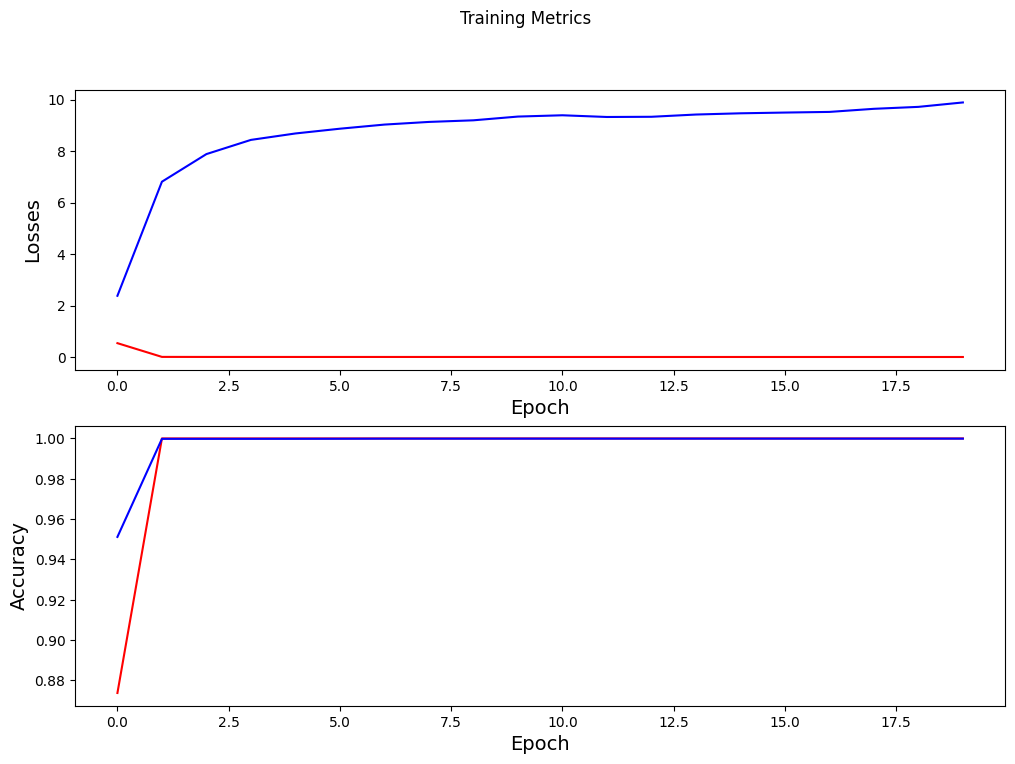

In [22]:
# %reload_ext tensorboard
# %tensorboard --logdir logs/gradient_tape

fig, axes = plt.subplots(2, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Losses", fontsize=14)
axes[0].set_xlabel("Epoch", fontsize=14)
axes[0].plot(disc_losses_list, color='red')
axes[0].plot(gen_losses_list, color='blue')

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(fake_disc_accuracy_list, color='red')
axes[1].plot(real_disc_accuracy_list, color='blue')
plt.show()

(32, 1000, 1)
(1000, 1)


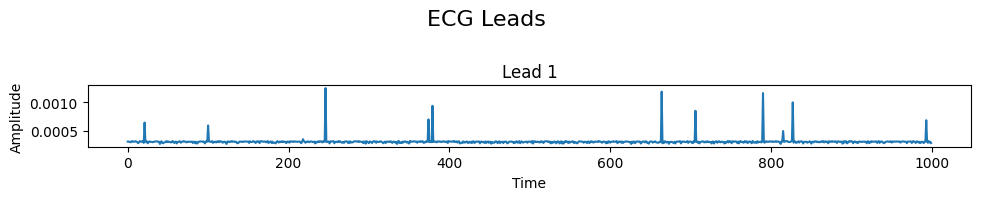

In [24]:
print(answer.shape)

ecg = answer[0]  
print(ecg.shape)
num_leads_1 = ecg.shape[1]  

fig, axes = plt.subplots(num_leads_1, 1, figsize=(10, 2 * num_leads_1))
fig.suptitle("ECG Leads", fontsize=16)

if num_leads_1 == 1:
    axes = [axes]

for i in range(num_leads_1):
    axes[i].plot(ecg)  
    axes[i].set_title(f"Lead {i + 1}")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

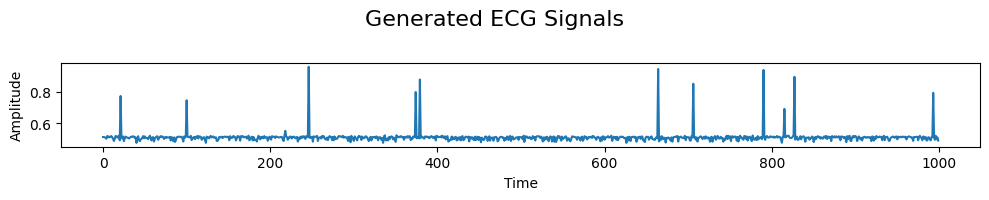

In [28]:
import matplotlib.pyplot as plt

ecg_generated = generated_ecg.numpy()  

num_signals = ecg_generated.shape[0]  
signal_length = ecg_generated.shape[1] 

fig, axes = plt.subplots(1, 1, figsize=(10, 2))
fig.suptitle("Generated ECG Signals", fontsize=16)

axes.plot(ecg_generated[0, :, 0])  
axes.set_xlabel("Time")
axes.set_ylabel("Amplitude")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [30]:
generator.save('/kaggle/working/generator_80e.h5')
discriminator.save('/kaggle/working/discriminator_80e.h5')

In [31]:
model = tf.keras.models.load_model('generator_80e.h5')

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │       513,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 690,536 (2.63 MB)

 Trainable params: 690,536 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
import tensorflow as tf

class MMDStatistic:
    def __init__(self, n_samples_target, n_samples_pred):
        self.n_samples_target = n_samples_target
        self.n_samples_pred = n_samples_pred

    def __call__(self, sample_target, sample_pred, bandwidths):
        # Пример вычислений для MMD, используйте свою реализацию для вычисления MMD
        # Здесь будет упрощенная версия для понимания:
        # Вычисление ядра между target и prediction
        target_kernel = tf.matmul(sample_target, sample_target, transpose_b=True)
        pred_kernel = tf.matmul(sample_pred, sample_pred, transpose_b=True)
        cross_kernel = tf.matmul(sample_target, sample_pred, transpose_b=True)
        
        # Пример вычисления MMD статистики (замените на свою логику)
        return tf.reduce_mean(target_kernel + pred_kernel - 2 * cross_kernel)

def mmd(targets, predictions):
    # Преобразуем тензоры TensorFlow в нужную форму
    targets = tf.cast(targets, dtype=tf.float32)
    predictions = tf.cast(predictions, dtype=tf.float32)
    
    # Убедитесь, что размерность соответствует (1000, 1) для обоих
    targets = tf.reshape(targets, (-1, 1))  # Автоматически определяет нужный размер
    predictions = tf.reshape(predictions, (-1, 1))  # Автоматически определяет нужный размер
    
    # Создание объекта для вычисления MMD
    mmd_stat = MMDStatistic(400, 400)
    
    # Вычисление MMD
    stat = mmd_stat(targets, predictions, [1.])  # Здесь передаётся параметр bandwidth
    
    return stat.numpy()

def rmse(targets, predictions):
    targets = tf.cast(targets, dtype=tf.float64)  # Преобразуем targets в float64
    predictions = tf.cast(predictions, dtype=tf.float64)  # Преобразуем predictions в float64
    return np.sqrt(np.mean((targets - predictions) ** 2))



def prd(targets, predictions):
    # Приведение типов данных к float32
    targets = tf.cast(targets, dtype=tf.float32)
    predictions = tf.cast(predictions, dtype=tf.float32)
    
    # Проверка формы данных и преобразование, если необходимо
    if len(targets.shape) == 1:  # Если форма (1000,)
        targets = tf.expand_dims(targets, axis=-1)  # Преобразуем в (1000, 1)
    
    if len(predictions.shape) == 1:  # Если форма (1000,)
        predictions = tf.expand_dims(predictions, axis=-1)  # Преобразуем в (1000, 1)
    
    # Теперь формы должны быть одинаковыми
    if targets.shape != predictions.shape:
        raise ValueError(f"Shape mismatch: targets {targets.shape}, predictions {predictions.shape}")
    
    # Вычисление PRD
    prd_value = tf.reduce_mean(tf.abs(targets - predictions) / targets)
    return prd_value.numpy()  # Преобразуем в numpy для использования в дальнейшем



def testing(test_dataset, model, noise_dim):
    mmd_sum, prd_sum, rmse_sum = [], [], []

    for batch_idx, true_ecg in enumerate(test_dataset):
        print(f"Batch {batch_idx}: type of true_ecg={type(true_ecg)}")
        
        if isinstance(true_ecg, tuple):
            true_ecg = true_ecg[0]  # или, если нужно, используйте второй элемент tuple, например: true_ecg = true_ecg[1]
        
        print(f"Batch {batch_idx}: true_ecg shape={true_ecg.shape}")
        
        noise = tf.random.normal([len(true_ecg), noise_dim], dtype=tf.float64)
        gen_ecg = model(noise, training=False)  # Генерация ECG моделью для текущего батча

        # Проверка на NaN или Inf
        if tf.reduce_any(tf.math.is_nan(gen_ecg)) or tf.reduce_any(tf.math.is_inf(gen_ecg)):
            print(f"Invalid generated ECG for batch {batch_idx}")
            continue

        # Преобразование true_ecg
        true_ecg_reduced = tf.reduce_mean(true_ecg, axis=-1) if len(true_ecg.shape) == 3 else true_ecg

        # Проверка согласованности размеров
        if true_ecg_reduced.shape[0] != gen_ecg.shape[0]:
            print(f"Batch size mismatch for batch {batch_idx}, skipping...")
            continue

        # Вычисление метрик для каждого элемента в батче
        for i in range(len(true_ecg)):
            # print(gen_ecg[i])
            prd_value = prd(true_ecg_reduced[i], gen_ecg[i])
            rmse_value = rmse(true_ecg_reduced[i], gen_ecg[i])
            mmd_value = mmd(true_ecg_reduced[i], gen_ecg[i])

            prd_sum.append(prd_value)
            rmse_sum.append(rmse_value)
            mmd_sum.append(mmd_value)

    # Вывод средних значений метрик
    print('mmd :', f'mean={np.mean(mmd_sum):.6f}', f'min={np.min(mmd_sum):.6f}', f'max={np.max(mmd_sum):.6f}')
    print('prd :', f'mean={np.mean(prd_sum):.4f}', f'min={np.min(prd_sum):.4f}', f'max={np.max(prd_sum):.4f}')
    print('rmse:', f'mean={np.mean(rmse_sum):.4f}', f'min={np.min(rmse_sum):.4f}', f'max={np.max(rmse_sum):.4f}')


In [34]:
noise_dim = 100  # Задайте размерность латентного пространства
testing(test_dataset, model, noise_dim)

Batch 0: type of true_ecg=<class 'tuple'>
Batch 0: true_ecg shape=(32, 1000, 12)
Batch 1: type of true_ecg=<class 'tuple'>
Batch 1: true_ecg shape=(32, 1000, 12)
Batch 2: type of true_ecg=<class 'tuple'>
Batch 2: true_ecg shape=(32, 1000, 12)
Batch 3: type of true_ecg=<class 'tuple'>
Batch 3: true_ecg shape=(32, 1000, 12)
Batch 4: type of true_ecg=<class 'tuple'>
Batch 4: true_ecg shape=(32, 1000, 12)
Batch 5: type of true_ecg=<class 'tuple'>
Batch 5: true_ecg shape=(32, 1000, 12)
Batch 6: type of true_ecg=<class 'tuple'>
Batch 6: true_ecg shape=(32, 1000, 12)
Batch 7: type of true_ecg=<class 'tuple'>
Batch 7: true_ecg shape=(32, 1000, 12)
Batch 8: type of true_ecg=<class 'tuple'>
Batch 8: true_ecg shape=(32, 1000, 12)
Batch 9: type of true_ecg=<class 'tuple'>
Batch 9: true_ecg shape=(32, 1000, 12)
Batch 10: type of true_ecg=<class 'tuple'>
Batch 10: true_ecg shape=(32, 1000, 12)
Batch 11: type of true_ecg=<class 'tuple'>
Batch 11: true_ecg shape=(32, 1000, 12)
Batch 12: type of true_e